## Final Project
### GROUP 4: Peipei Gao, Yike Liu, Jennifer Nguyen, Yue Zheng
#### Group Lead: Jennifer Nguyen

## Ask 1 – Search for a dataset

For the project, our group would like to look into this dataset about Charities and Non-profit organizations in the United States’ Mid-Atlantic and Great Lakes Areas. More specifically, the dataset presents organizations’ basic information, financial situations, and classifications. You can download the dataset in the CSV format [here](https://www.irs.gov/pub/irs-soi/eo2.csv). The dataset’s size is 113.8 MB and is last updated on 11/11/2019.
The dataset has 644942 records at the transactional level and 28 variables. Each record represents a tax-exempt organization and provides the following information. 


To complete the modify process, we use csvkit to remove the unnecessary columns and create the new dataset which we plan to use for the project.

Firstly we upload the dataset to Jupyter notebook and check it by applying csvkit and xsv.

You can find the data dictionary and more information about each field [here](https://www.irs.gov/pub/irs-soi/eo_info.pdf)

#### Dataset Source 
The dataset above represents `Region 2: Mid-Atlantic and Great Lakes Areas`, which is one of the four regions covering the whole nation documented under [Exempt Organizations Business Master File Extract (EO BMF](https://www.irs.gov/charities-non-profits/exempt-organizations-business-master-file-extract-eo-bmf) from the Internal Revenue Service’ database(https://www.irs.gov/). 
Information on EO BMF is extracted monthly from the IRS’ Business Master File. 



#### Why this dataset?
There are several reasons why we chose this dataset. First, all members of our groups consider Non-profits as potential employers after graduation. Thus, this dataset will help people with an interest in either working at or researching non-profits better understand the overall landscape of such organizations in the US. They can use it as a directory to search for organizations that match their interests regarding sizes, locations, and organization’s mission focuses, for example. Since we live in DC and Virginia, we chose the dataset for region 2. 

Second, we are interested in assessing the financial situations of these organizations regarding profitability(income) and revenue, to see whether US charities & nonprofits are doing well financially. Which segments are doing well? Which segments are losing money? Financials may disclose the quality of management and the preferences of American donors.

Last but not least, we want a dataset with considerably tidy data and clear data description. This dataset offers all of those and has reasonable dimensions to work with. Therefore, the dataset is a great frame for us to do dimensional modeling and analysis. 

#### Is this dataset suitable for dimensional modeling and analytical analysis?
Yes. This dataset has clear numerical fields for the fact tables and a variety of categorical attributes for our dimension tables. Since many categorical attributes are represented under code form, it will be easier to sort and work with. Moreover, some attributes have the potential to form derived attributes such as ZIP and RULING for better performance. Finally, we can form many interesting questions based on this dataset. 


#### Analytical questions we can answer with this data
Which tax-exempt organizations to which contributions are not deductible have the highest revenue in the 2018 tax period?
Which activity has the highest and lowest number of organizations? Out of the most popular activities, what’s the average income for the exempt organizations in each state?
Consider the last 5 tax periods.  Which months have the highest number of organizations that first received the exempt status?
  
#### Concerns with the data and changes we expect to overcome 

* First, this dataset is quite large with more than 640 thousand rows. Therefore, the processing time for codes will be slow. 
* Second, this dataset contains many categorical attributes that all describe organizations’ types of activities in slightly different ways. (They are Subsection code & Affiliation code, Foundation code, Activities codes, and NTEE Code.) This can confuse us while doing analysis as well as confuse the audience. Thus, later, we will only keep 1 or 2 attributes of this kind that we deem relevant to answer our analytical questions.
* Third, in the next part, we will filter out attributes that are not relevant to our questions, such as ICO. Additionally, since our questions concern with income and revenue, we consider removing observations that have NULL values in those attributes. 


## Ask 2: Data Wrangling and Dimensional Modeling

In [1]:
!wget https://gwu-workshop-yzheng1-2019.s3.amazonaws.com/eo2.csv

--2019-11-29 02:57:58--  https://gwu-workshop-yzheng1-2019.s3.amazonaws.com/eo2.csv
Resolving gwu-workshop-yzheng1-2019.s3.amazonaws.com (gwu-workshop-yzheng1-2019.s3.amazonaws.com)... 52.216.168.107
Connecting to gwu-workshop-yzheng1-2019.s3.amazonaws.com (gwu-workshop-yzheng1-2019.s3.amazonaws.com)|52.216.168.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113775047 (109M) [text/csv]
Saving to: ‘eo2.csv’

eo2.csv             100%[===================>] 108.50M  51.0MB/s    in 2.1s    

2019-11-29 02:58:00 (51.0 MB/s) - ‘eo2.csv’ saved [113775047/113775047]



use xsv headers to find the heading (attribute labels) of the eo2 file

In [2]:
!xsv headers eo2.csv

1   EIN
2   NAME
3   ICO
4   STREET
5   CITY
6   STATE
7   ZIP
8   GROUP
9   SUBSECTION
10  AFFILIATION
11  CLASSIFICATION
12  RULING
13  DEDUCTIBILITY
14  FOUNDATION
15  ACTIVITY
16  ORGANIZATION
17  STATUS
18  TAX_PERIOD
19  ASSET_CD
20  INCOME_CD
21  FILING_REQ_CD
22  PF_FILING_REQ_CD
23  ACCT_PD
24  ASSET_AMT
25  INCOME_AMT
26  REVENUE_AMT
27  NTEE_CD
28  SORT_NAME


There are 28 columns totally in the original dataset.

Since we want to remove 13 columns from the dataset, we can just select the columns which we want to reverve and create a new dataset called 'eo2n'.

* EIN 1
* NAME 2
* STREET 4
* CITY 5
* STATE 6
* ZIP 7
* SUBSECTION 9
* CLASSIFICATION 11
* RULING 12
* DEDUCTIBILITY 13
* ACTIVITY 15
* TAX_PERIOD 18
* INCOME_CD 20
* INCOME_AMT 25
* REVENUE_AMT 26

In [4]:
!csvcut -c 1,2,4,5,6,7,9,11,12,13,15,18,20,25,26 eo2.csv > eo2n.csv

check the number of lines in the eo2n file

In [ ]:
!wc -l eo2n.csv

use csvcut -n to find the heading (attribute labels) of the eo2n file

In [1]:
!csvcut -n eo2n.csv

  1: EIN
  2: NAME
  3: STREET
  4: CITY
  5: STATE
  6: ZIP
  7: SUBSECTION
  8: CLASSIFICATION
  9: RULING
 10: DEDUCTIBILITY
 11: ACTIVITY
 12: TAX_PERIOD
 13: INCOME_CD
 14: INCOME_AMT
 15: REVENUE_AMT


Now there are 15 columns totally in the new dataset, eo2n.

check the first few rows of the dataset in the 15 fields

In [2]:
!head -n 10 eo2n.csv

EIN,NAME,STREET,CITY,STATE,ZIP,SUBSECTION,CLASSIFICATION,RULING,DEDUCTIBILITY,ACTIVITY,TAX_PERIOD,INCOME_CD,INCOME_AMT,REVENUE_AMT
002120849,ANCILLA DOMINI SISTERS INC,LOCAL,DONALDSON,IN,46513-0000,03,1270,194603,1,150120000,,0,,
010036381,DISABLED AMERICAN VETERANS,15623 S CENTERLINE RD,RUDYARD,MI,49780-9349,04,3000,194206,1,908279265,201806,0,0,0
010060379,HEALING AND DELIVERANCE MINISTRY INC,14103 BYRNE PARK DR,CLARKSBURG,MD,20871-6337,03,7000,201407,1,000000000,,0,,
010123106,MORNING STAR BAPTIST CHURCH,3204 BROTHERS PL SE,WASHINGTON,DC,20032-1501,03,7000,196811,1,029000000,,0,,
010158948,SIGMA KAPPA SORORITY,695 PRO-MED LN STE 300,CARMEL,IN,46032-5331,07,1000,194301,2,036000000,201805,7,6808224,4862977
010284545,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS-MAINE,600 STATE ST STE A,CEDAR FALLS,IA,50613-3371,06,1000,197607,2,205202000,201906,0,0,0
010319131,SIGMA DELTA PI,3 BAINBRIDGE DR,CHARLESTON,SC,29407-4213,03,1000,199906,1,059000000,201808,0,0,0
010356732,CARRIAGE 

Then we can use xsv stat to summarize the statistical information of each column.

In [4]:
!xsv select 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15 eo2n.csv | xsv stats | xsv table

field           type     sum              min                 max               min_length  max_length  mean                stddev
EIN             Integer  292314593038451  2120849             998997790         9           9           453241676.0552928   203801865.79812875
NAME            Unicode                   0003 POSTAL FAMILY  ZYGOTE PRESS INC  1           70                              
STREET          Unicode                   0                   ZOI KENTAVE       1           35                              
CITY            Unicode                   AARONSBURG          ZZZ               3           22                              
STATE           Unicode                   DC                  WV                2           2                               
ZIP             Unicode                   15001-0000          89509-1435        10          10                              
SUBSECTION      Integer  2921627          0                   92                2           2        

As we can see from the result, the data length for EIN, ZIP, SUBSECTION, CLASSIFICATION, RULING, DEDUCTIBILITY, ACTIVITY, and INCOME_CD are all fixed for all the records of the same attribute.

We assume that EIN can be considered as the primary key of the dataset, so we use csvstat to check if the values of this attribute are unique or not. Because the data size is too large, we can firstly examine first 10% of the records to check our assumption.


In [5]:
!head -n 65000 eo2n.csv | csvstat

  1. "EIN"

	Type of data:          Number
	Contains null values:  False
	Unique values:         64999
	Smallest value:        2,120,849
	Largest value:         237,031,492
	Sum:                   11,968,888,529,546
	Mean:                  184,139,579.525
	Median:                204,875,976
	StDev:                 67,062,460.899
	Most common values:    2,120,849 (1x)
	                       10,036,381 (1x)
	                       10,060,379 (1x)
	                       10,123,106 (1x)
	                       10,158,948 (1x)

  2. "NAME"

	Type of data:          Text
	Contains null values:  False
	Unique values:         54531
	Longest value:         70 characters
	Most common values:    AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES (589x)
	                       UNITED STATES BOWLING CONGRESS INC (397x)
	                       INTERNATIONAL ASSOCIATION OF LIONS CLUBS (329x)
	                       TOASTMASTERS INTERNATIONAL (316x)
	                       REGENTS OF THE UNIVE

The result shows that the first 10% of the records of EIN values are all unique, so our assumption should be reasonable so far.

#### we do our following cleanning steps on Trifacta####

As we have cleaned our dataset in notebook, we can filter and clean the data deeper in Trifacta.

- **EIN** : To check if the values on column “EIN” are unique by looking at the column detail; they are unique since the unique number is same as the valid number

- **Street, City, Stat** : Column Street, City, State have no missing values
- **ZIP** : Since most people only use the first five digits zip code, we extract the first five and create a new column named Five-digits ZIP

- **SUBSECTION** : By looking at the column detail of SUBSECTION, we found there are some value 91, 82 and 00,  which  are not included in the description of the dataset. From the description, SUBSECTION only include number 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 40, 50, 60, 70, 71, 81, 92.
- So we delete the rows which containing 91,82 and 00

- **CLASSIFICATION** : There are no missing values on column CLASSIFICATION. The valid classification codes should be one digit format from 1 to 8, however, “the IRS recently implemented classification code to capture up to 4 codes related to an organization”, so in this case, we delete 0 which means no additional related codes, and keep those with one or more related codes.

- **Ruling** : The column RULING includes the year and month recognizing the organization’s exempt status. To see if the year and month are within reasonable range, eg. months are from 01 to 12, we split the six digit number into 4 digit number (year) and 2 digit number (month) and named ad RUNLING_YEAR and RUNLING_MONTH. RULING_YEAR is from 1900 to 2019, and RULING_MONTH has total 12 categories from 01-12.
01. We can check from patterns detailed that there are mismatched values on 'RULING_YEAR: In this case, we replace it with NULL.
02. And we do the same things on Rulling-Month:(replace ‘00’ with NULL)

- **DEDUCTIBILITY** : From the description, column DEDUCTIBILITY only has code 1, 2, and 4. From the description, column DEDUCTIBILITY only has code 1, 2, and 4. From the column detail of DEDUCTIBILITY, it has 1, 2, 4, and 0, So it has null values 0. In this case, we convert 0 into null value.

- **ACTIVITY** : For column ACTIVITY, the codes should be 9 digits code which contains one to three activity codes, so in this case, we split the column into three parts, and name them as Activity1,Activity2 and Activity3.

- **TAX_PERIOD** : The column TAX_PERIOD has missing values, replaced by null. 

- **INCOME_CD** : Column INCOME_CD is good with range from 0 to 9 as the description indicated.

- **INCOME_AMT, REVENUE_AMT** : Column INCOME_AMT and REVENUE_AMT have missing values, replaced by Null.

**Receipts**
```
extractbetweendelimiters col: ZIP end: '-'
rename type: manual mapping: [ZIP1,'Five-digits ZIP']
filter type: oneOf col: SUBSECTION oneOf: SUBSECTION = 91 && SUBSECTION = 82 && SUBSECTION = 0 action: Delete
replacepatterns col: CLASSIFICATION with: '' on: `00`
replacepatterns col: CLASSIFICATION with: '' on: '0'
splitpositions col: RULING type: positions positions: 4 limit: 1
rename type: manual mapping: [RULING1,'RUNLING_YEAR']
rename type: manual mapping: [RULING2,'RULING_MONTH']
replacemismatched col: RUNLING_YEAR mismatched: 'Datetime','yy','yyyy' type: custom with: null text: ''
replacepatterns col: RULING_MONTH with: '' on: '00'
replacemissing col: RULING_MONTH with: null text: ''
replacecells col: DEDUCTIBILITY with: '' on: '0'
replacemissing col: DEDUCTIBILITY with: null text: ''
splitpositions col: ACTIVITY type: every interval: 3 limit: 2 start: 3
replacemissing col: TAX_PERIOD with: null text: ''
replacemissing col: INCOME_AMT with: null text: ''
replacemissing col: REVENUE_AMT with: null text: ''

```


After cleaning and splitting on Trifacta, we get our final dataset.

****Upload the data file which has been cleaned by Trifacta****

In [1]:
!wget https://data-management-yike.s3.amazonaws.com/eo2n_2.csv

--2019-12-01 22:22:18--  https://data-management-yike.s3.amazonaws.com/eo2n_2.csv
Resolving data-management-yike.s3.amazonaws.com (data-management-yike.s3.amazonaws.com)... 52.217.41.164
Connecting to data-management-yike.s3.amazonaws.com (data-management-yike.s3.amazonaws.com)|52.217.41.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82509632 (79M) [text/csv]
Saving to: ‘eo2n_2.csv.1’

eo2n_2.csv.1        100%[===================>]  78.69M  74.0MB/s    in 1.1s    

2019-12-01 22:22:20 (74.0 MB/s) - ‘eo2n_2.csv.1’ saved [82509632/82509632]



In [2]:
%load_ext sql

First, use PostgreSQL's dropdb command to drop the database named Project, if it exists. It is necessary so that we can run this notebook repeatedly. If you get the error that says "database Project does not exist", that is fine. However, if it complains that "There is 1 other session using the database", please restart the Kernel and try it again.

In [3]:
!dropdb -U student final_project


The output said that database Project does not exist, so we can just create it. Now use PostgreSQL's `createdb` command to create the database named Project.


In [4]:
!createdb -U student final_project

Use sql magic to connect to the database we just created

In [5]:
%sql postgresql://student@/final_project

'Connected: student@final_project'

Use the CREATE TABLE command. It is a good practice to DROP the table first then create it in case the table already exists.
Creating table Exempt_Organization as the fact table


In [6]:
%%sql
DROP TABLE IF EXISTS Exempt_Organization;

CREATE TABLE Exempt_Organization (
    EIN                 VARCHAR NOT NULL,
    NAME                VARCHAR(100),
    STREET              VARCHAR(50) NOT NULL,
    CITY                VARCHAR NOT NULL,
    STATE               CHAR(2) NOT NULL,
    ZIP                 CHAR(10) DEFAULT'9999-999',
    Five_digit_ZIP      NUMERIC(5) DEFAULT'99999',
    SUBSECTION          VARCHAR NOT NULL,
    CLASSIFICATION      VARCHAR NOT NULL,
    RULING_YEAR         VARCHAR(4) DEFAULT'9999',
    RULING_MONTH        NUMERIC(2) DEFAULT'99',
    DEDUCTIBILITY       VARCHAR,
    ACTIVITY1           NUMERIC(3) NOT NULL DEFAULT'999',
    ACTIVITY2           NUMERIC(3) NOT NULL,
    ACTIVITY3           NUMERIC(3) NOT NULL,
    STATUS              VARCHAR(2),
    TAX_PERIOD          VARCHAR,
    INCOME_CD           INTEGER NOT NULL,
    INCOME_AMT          NUMERIC,
    REVENUE_AMT         NUMERIC 
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [7]:
%%sql
select * from Exempt_Organization

 * postgresql://student@/final_project
0 rows affected.


ein,name,street,city,state,zip,five_digit_zip,subsection,classification,ruling_year,ruling_month,deductibility,activity1,activity2,activity3,status,tax_period,income_cd,income_amt,revenue_amt


Populate our Exempt_Organization table with data from the file eo2n_2.csv

In [8]:
%%sql
COPY Exempt_Organization FROM '/home/ubuntu/eo2n_2.csv'
CSV
HEADER;

 * postgresql://student@/final_project
644942 rows affected.


[]

Since the NULL values in RULING_YEAR, RULING_MONTH, and TAX_PERIOD column in the EXEMPT_ORGANIZATION table will cause troubles when we use SELECT DISTINCT in the next step, we’ve decided to turn all of the NULL values in these 3 attributes into 0. 
(If we don’t do these steps, when we insert the values in the main table into the Time table, the Time table will NOT include records where only one or two variables are NULL. For example: RULING_YEAR = 2018, RULING_MONTH = 01, TAX_PERIOD is NULL.)

In [9]:
%%sql
update exempt_organization 
set ruling_year = 0
where ruling_year is NULL

 * postgresql://student@/final_project
5778 rows affected.


[]

In [10]:
%%sql
update exempt_organization 
set ruling_month = 0
where ruling_month is NULL

 * postgresql://student@/final_project
5778 rows affected.


[]

In [11]:
%%sql
update exempt_organization 
set tax_period = 0
where tax_period is NULL

 * postgresql://student@/final_project
125349 rows affected.


[]

In [12]:
%%sql
select * from Exempt_Organization
limit 10;

 * postgresql://student@/final_project
10 rows affected.


ein,name,street,city,state,zip,five_digit_zip,subsection,classification,ruling_year,ruling_month,deductibility,activity1,activity2,activity3,status,tax_period,income_cd,income_amt,revenue_amt
10036381,DISABLED AMERICAN VETERANS,15623 S CENTERLINE RD,RUDYARD,MI,49780-9349,49780,4,3,1942,6,1,908,279,265,1,201806,0,0,0
10158948,SIGMA KAPPA SORORITY,695 PRO-MED LN STE 300,CARMEL,IN,46032-5331,46032,7,1,1943,1,2,36,0,0,1,201805,7,6808224,4862977
10284545,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS-MAINE,600 STATE ST STE A,CEDAR FALLS,IA,50613-3371,50613,6,1,1976,7,2,205,202,0,1,201906,0,0,0
10319131,SIGMA DELTA PI,3 BAINBRIDGE DR,CHARLESTON,SC,29407-4213,29407,3,1,1999,6,1,59,0,0,1,201808,0,0,0
10356732,CARRIAGE MUSEUM OF AMERICA,4075 IRON WORKS PKWY,LEXINGTON,KY,40511-8483,40511,3,1,1978,8,1,149,60,0,1,201712,4,427507,67851
10365191,ASSOCIATION OF SMALL BUSINESS DEVELOPMENT CENTERS,8990 BURKE LAKE RD,BURKE,VA,22015-1606,22015,6,2,1979,10,2,200,0,0,1,201712,6,2878047,2845481
10366094,BEULAH M & CHARLES O VARNEY TRUST 10-10-121-0044980 10-10-121-004500,4900 TIEDEMAN RD OH-01-49-0150,BROOKLYN,OH,44144-2338,44144,91,1,1970,12,None,909,0,0,12,201904,4,163385,8787
10371074,MAINE CHAPTER OF THE AMERICAN PHYSICAL THERAPY ASSOCIATION INC,1055 N FAIRFAX ST STE 204,ALEXANDRIA,VA,22314-1541,22314,6,1,1990,1,2,205,0,0,1,201812,0,0,0
10372129,NORTH AMERICAN LAKE MANAGEMENT SOCIETY,PO BOX 5443,MADISON,WI,53705-0443,53705,3,2,1990,6,1,351,0,0,1,201712,4,428282,428282
10414466,SMITH COVE PRESERVATION TRUST,8223 BRECKSVILLE RD STE 100,BRECKSVILLE,OH,44141-1361,44141,3,1,1988,6,1,350,0,0,1,201812,1,1,None


**create basic_information as a dimension table**

Create the Basic_information table as a dimension table

In [13]:
%%sql
DROP TABLE IF EXISTS Basic_information;

CREATE TABLE Basic_information (
    Key                 SERIAL PRIMARY KEY,
    EIN                 VARCHAR NOT NULL,
    NAME                VARCHAR(100),
    SUBSECTION          VARCHAR NOT NULL,
    CLASSIFICATION      VARCHAR NOT NULL,
    DEDUCTIBILITY       VARCHAR,
    ACTIVITY1           NUMERIC(3) NOT NULL,
    ACTIVITY2           NUMERIC(3) NOT NULL,
    ACTIVITY3           NUMERIC(3) NOT NULL,
    STATUS              VARCHAR(2)
);

 * postgresql://student@/final_project
Done.
Done.


[]

Populate the Basic_information table with data from table Exempt_Organization

In [14]:
%%sql
INSERT INTO Basic_information (EIN, NAME, SUBSECTION, CLASSIFICATION, DEDUCTIBILITY, ACTIVITY1, ACTIVITY2, ACTIVITY3,STATUS)
SELECT DISTINCT EIN, NAME, SUBSECTION, CLASSIFICATION, DEDUCTIBILITY, ACTIVITY1, ACTIVITY2, ACTIVITY3,STATUS
FROM Exempt_Organization;

 * postgresql://student@/final_project
644942 rows affected.


[]

In [15]:
%%sql
select * from Basic_information limit 10

 * postgresql://student@/final_project
10 rows affected.


key,ein,name,subsection,classification,deductibility,activity1,activity2,activity3,status
1,100004902,UPLIFTING SPIRIT CHURCH IN CHRIST INC,3,7,1,0,0,0,1
2,100005187,AMERICAN AMISTAD FOUNDATION INC,3,1,1,0,0,0,1
3,100006726,MICHIGAN STATE UNIVERSITY,3,2,1,0,0,0,1
4,100007528,AMERICAN ACADEMY OF PODIATRIC PRACTICE MANAGEMENT,6,2,2,0,0,0,1
5,100007967,STONE GARAGE,3,1,1,0,0,0,1
6,10036381,DISABLED AMERICAN VETERANS,4,3,1,908,279,265,1
7,10060379,HEALING AND DELIVERANCE MINISTRY INC,3,7,1,0,0,0,1
8,10123106,MORNING STAR BAPTIST CHURCH,3,7,1,29,0,0,1
9,10158948,SIGMA KAPPA SORORITY,7,1,2,36,0,0,1
10,102244829,CAPITOL CITY CORVETTE CLUB,3,1,1,0,0,0,1


Next, we add FK basic_information_key to the Exempt_Organization table:


In [16]:
%%sql
ALTER TABLE Exempt_Organization 
ADD COLUMN basic_information_key INTEGER,
ADD CONSTRAINT fk_basic_information
    FOREIGN KEY (basic_information_key)
    REFERENCES basic_information (key);

 * postgresql://student@/final_project
Done.


[]

Populate the basic_information_key


In [17]:
%%sql
UPDATE Exempt_Organization AS e
SET basic_information_key = b.key
FROM basic_information AS b
WHERE  e.ein = b.ein;

 * postgresql://student@/final_project
644942 rows affected.


[]

In [18]:
%%sql
select * from Basic_information limit 10

 * postgresql://student@/final_project
10 rows affected.


key,ein,name,subsection,classification,deductibility,activity1,activity2,activity3,status
1,100004902,UPLIFTING SPIRIT CHURCH IN CHRIST INC,3,7,1,0,0,0,1
2,100005187,AMERICAN AMISTAD FOUNDATION INC,3,1,1,0,0,0,1
3,100006726,MICHIGAN STATE UNIVERSITY,3,2,1,0,0,0,1
4,100007528,AMERICAN ACADEMY OF PODIATRIC PRACTICE MANAGEMENT,6,2,2,0,0,0,1
5,100007967,STONE GARAGE,3,1,1,0,0,0,1
6,10036381,DISABLED AMERICAN VETERANS,4,3,1,908,279,265,1
7,10060379,HEALING AND DELIVERANCE MINISTRY INC,3,7,1,0,0,0,1
8,10123106,MORNING STAR BAPTIST CHURCH,3,7,1,29,0,0,1
9,10158948,SIGMA KAPPA SORORITY,7,1,2,36,0,0,1
10,102244829,CAPITOL CITY CORVETTE CLUB,3,1,1,0,0,0,1


The basic_information_key attribute has been successfully added to the Exempt_Organization table from the output.

**Create the Time table as a dimension table**

In [27]:
%%sql
DROP TABLE IF EXISTS Time;

CREATE TABLE Time (
    key SERIAL PRIMARY KEY,
    RULING_YEAR         VARCHAR(4) DEFAULT'2002',
    RULING_MONTH        NUMERIC(2) DEFAULT'01',
    TAX_PERIOD          VARCHAR
);

 * postgresql://student@/final_project
Done.
Done.


[]

Populate the Time table with data from table Exempt_Organization

In [28]:
%%sql
INSERT INTO Time (RULING_YEAR,RULING_MONTH,TAX_PERIOD)
SELECT DISTINCT RULING_YEAR, RULING_MONTH,TAX_PERIOD
FROM Exempt_Organization;

 * postgresql://student@/final_project
26741 rows affected.


[]

Check the Time table we just created by examining the first 10 rows


In [29]:
%%sql
select * from time
limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,ruling_year,ruling_month,tax_period
1,1986,1,201706
2,1971,12,201905
3,1992,11,0
4,1999,7,201904
5,1961,11,201712
6,1933,9,201812
7,1955,1,0
8,1955,3,201807
9,1999,10,201805
10,1957,11,201805


Next, we add FK time_key to the Exempt_Organization table:


In [30]:
%%sql
ALTER TABLE Exempt_Organization 
ADD COLUMN time_key INTEGER,
ADD CONSTRAINT fk_time
    FOREIGN KEY (time_key)
    REFERENCES time (key);

 * postgresql://student@/final_project
Done.


[]

Populate the time_key by linking the attributes from time table and Exempt_Organization table


In [31]:
%%sql
UPDATE Exempt_Organization AS e
SET time_key = t.key
FROM time AS t
WHERE  e.ruling_year = t.ruling_year
       and e.tax_period = t.tax_period
       and e.ruling_month = t.ruling_month;

 * postgresql://student@/final_project
644942 rows affected.


[]

We can check the Basic_information table we just modified by examining the first 10 rows


In [32]:
%%sql
select* from Exempt_Organization
limit 10;

 * postgresql://student@/final_project
10 rows affected.


ein,name,street,city,state,zip,five_digit_zip,subsection,classification,ruling_year,ruling_month,deductibility,activity1,activity2,activity3,status,tax_period,income_cd,income_amt,revenue_amt,basic_information_key,time_key
256018626,EMMA W LOCKE MEMORIAL FUND 500-052,PO BOX 185,PITTSBURGH,PA,15230-0185,15230,91,1,0,0,None,909,0,0,12,0,5,None,None,103690,26686
10879513,NATIONAL WILD TURKEY FEDERATION INC,PO BOX 530,EDGEFIELD,SC,29824-0530,29824,3,2,0,0,None,0,0,0,1,0,0,None,None,1621,26686
351799914,SIXTH STREET WESLEYAN CHURCH,426 S 25TH ST,TERRE HAUTE,IN,47803-2627,47803,3,72,0,0,None,0,0,0,1,0,0,None,None,210594,26686
341407504,THE NEY CHURCH OF GOD OF THE GREAT LAKES CONF OF THE CHURCHES OF GOD,PO BOX 69,NEY,OH,43549-0069,43549,3,7,0,0,None,0,0,0,1,0,0,None,None,190872,26686
460358931,LAKE ANDES,1001 E MAIN ST,LAKE ANDES,SD,57356-2046,57356,3,72,0,0,None,0,0,0,1,0,0,None,None,366995,26686
340733123,ANNUNCIATION CHURCH,4697 W 130TH ST,CLEVELAND,OH,44135-3760,44135,3,7,0,0,1,1,0,0,1,0,0,None,None,186086,26686
363758938,GRACE BIBLE CHURCH OF BERWYN,6900 16TH ST,BERWYN,IL,60402-1341,60402,3,7,0,0,None,0,0,0,1,0,0,None,None,236982,26686
316457387,LULA T DICK CHARITABLE 61-6861195200,PO BOX 1308,MILWAUKEE,WI,53201-1308,53201,91,1,0,0,None,0,0,0,12,0,3,None,None,179010,26686
611282428,LIFE IN CHRIST CHURCH INC,PO BOX 296,MARION,KY,42064-0296,42064,3,7,0,0,None,0,0,0,1,0,0,None,None,526806,26686
316039108,JONAHS RUN BAPTIST CHURCH,9614 STATE RT 73 W,WILMINGTON,OH,45177-9209,45177,3,7,0,0,1,1,0,0,1,0,0,None,None,177211,26686


The time_key attribute has been successfully added to the Exempt_Organization table from the output.

**create Income_classification as a dimension table**

In [33]:
%%sql
DROP TABLE IF EXISTS Income_classification;

CREATE TABLE Income_classification (
    key SERIAL PRIMARY KEY,
    INCOME_CD  INTEGER NOT NULL
);

 * postgresql://student@/final_project
Done.
Done.


[]

Populate the Income_classification table with data from the Exempt_Organization table


In [34]:
%%sql
INSERT INTO Income_classification (INCOME_CD)
SELECT DISTINCT INCOME_CD 
FROM Exempt_Organization;

 * postgresql://student@/final_project
10 rows affected.


[]

 Check the Income_classification table we just created by examining the first 10 rows


In [35]:
%%sql
SELECT * FROM Income_classification;

 * postgresql://student@/final_project
10 rows affected.


key,income_cd
1,6
2,8
3,2
4,1
5,3
6,4
7,5
8,9
9,0
10,7


Populate the INCOME_CD_KEY


In [36]:
%%sql
ALTER TABLE Exempt_Organization
ADD COLUMN INCOME_CD_KEY INTEGER,
ADD CONSTRAINT FK_INCOME_CD
    FOREIGN KEY (INCOME_CD_KEY)
    REFERENCES Income_classification(key);

 * postgresql://student@/final_project
Done.


[]

Update and link the primary key

In [37]:
%%sql
UPDATE Exempt_Organization AS e
SET INCOME_CD_KEY = i.key
FROM Income_classification AS i
WHERE e.INCOME_CD = i.INCOME_CD;

 * postgresql://student@/final_project
644942 rows affected.


[]

We can check the Exempt_Organization table we just modified by examining the first 10 rows

In [38]:
%%sql
select * from Exempt_Organization limit 10;

 * postgresql://student@/final_project
10 rows affected.


ein,name,street,city,state,zip,five_digit_zip,subsection,classification,ruling_year,ruling_month,deductibility,activity1,activity2,activity3,status,tax_period,income_cd,income_amt,revenue_amt,basic_information_key,time_key,income_cd_key
256018626,EMMA W LOCKE MEMORIAL FUND 500-052,PO BOX 185,PITTSBURGH,PA,15230-0185,15230,91,1,0,0,None,909,0,0,12,0,5,None,None,103690,26686,7
10879513,NATIONAL WILD TURKEY FEDERATION INC,PO BOX 530,EDGEFIELD,SC,29824-0530,29824,3,2,0,0,None,0,0,0,1,0,0,None,None,1621,26686,9
351799914,SIXTH STREET WESLEYAN CHURCH,426 S 25TH ST,TERRE HAUTE,IN,47803-2627,47803,3,72,0,0,None,0,0,0,1,0,0,None,None,210594,26686,9
341407504,THE NEY CHURCH OF GOD OF THE GREAT LAKES CONF OF THE CHURCHES OF GOD,PO BOX 69,NEY,OH,43549-0069,43549,3,7,0,0,None,0,0,0,1,0,0,None,None,190872,26686,9
460358931,LAKE ANDES,1001 E MAIN ST,LAKE ANDES,SD,57356-2046,57356,3,72,0,0,None,0,0,0,1,0,0,None,None,366995,26686,9
340733123,ANNUNCIATION CHURCH,4697 W 130TH ST,CLEVELAND,OH,44135-3760,44135,3,7,0,0,1,1,0,0,1,0,0,None,None,186086,26686,9
800757446,CHRIST COMMUNITY CHURCH,7671 AUBURN RD,PAINESVILLE,OH,44077-9608,44077,3,7,0,0,None,1,59,349,1,0,0,None,None,550359,26686,9
911917602,TOP LADIES OF DISTINCTION INC,5302 TORCHWOOD LOOP E,COLUMBUS,OH,43229-4606,43229,3,3,0,0,1,153,0,0,1,0,0,None,None,639064,26686,9
900057386,TEAMMATES MENTORING PROGRAM,1924 W A ST,HASTINGS,NE,68901-5650,68901,3,1,0,0,1,0,0,0,1,0,0,None,None,630873,26686,9
900057535,TEAMMATES MENTORING PROGRAM,320 N 5TH ST,BEATRICE,NE,68310-2957,68310,3,1,0,0,1,0,0,0,1,0,0,None,None,630877,26686,9


The INCOME_CD_KEY attribute has been successfully added to the Exempt_Organization table from the output.


**create Address as a dimension table**

In [39]:
%%sql
DROP TABLE IF EXISTS Address;

CREATE TABLE Address (
    key SERIAL PRIMARY KEY,
    STREET              VARCHAR(50) NOT NULL,
    CITY                VARCHAR NOT NULL,
    STATE               CHAR(2) NOT NULL,
    ZIP                 CHAR(10) DEFAULT'9999-999',
    Five_digit_ZIP     NUMERIC(5) DEFAULT'99999'
);

 * postgresql://student@/final_project
Done.
Done.


[]

Populate the Address table with data from the Exempt_Organization table


In [40]:
%%sql
INSERT INTO Address (STREET, CITY,STATE,ZIP,Five_digit_ZIP)
SELECT DISTINCT STREET, CITY,STATE,ZIP,Five_digit_ZIP
FROM Exempt_Organization;

 * postgresql://student@/final_project
520296 rows affected.


[]

 Check the Address table we just created by examining the first 10 rows


In [41]:
%%sql
SELECT * FROM Address
limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,street,city,state,zip,five_digit_zip
1,0,GETTYSBURG,PA,17325-0000,17325
2,0,LEHIGHTON,PA,18235-0000,18235
3,0,SHOREVIEW,MN,55126-0000,55126
4,0,XXXX,IL,60104-0000,60104
5,00000 EDWARDS RD,CINCINNATI,OH,45208-0000,45208
6,0022 WILLIAMS RD,WESTVILLE,IN,46391-9637,46391
7,002 EAST 1285 NORTH,NEOGA,IL,62447-0000,62447
8,002 ERICKSON HALL,LEXINGTON,KY,40506-0001,40506
9,00479 COUNTY ROAD 687,SOUTH HAVEN,MI,49090-8131,49090
10,0055 E STATE ROAD 10,NORTH JUDSON,IN,46366-8593,46366


Add FK Address_KEY to the Exempt_Organization table:

In [42]:
%%sql
ALTER TABLE Exempt_Organization
ADD COLUMN Address_KEY INTEGER,
ADD CONSTRAINT FK_Address
    FOREIGN KEY (Address_KEY)
    REFERENCES Address(key);

 * postgresql://student@/final_project
Done.


[]

Populate the Address_KEY by linking the attributes from address table and Exempt_Organization table


In [43]:
%%sql
UPDATE Exempt_Organization AS e
SET Address_KEY = a.key
FROM Address AS a
WHERE e.street = a.street
    and e.city = a.city
    and e.state = a.state
    and e.zip = a.zip
    and e.five_digit_zip = a.five_digit_zip;

 * postgresql://student@/final_project
644942 rows affected.


[]

Check the Exempt_Organization table we just modified by examining the first 10 rows


In [44]:
%%sql
select * from Exempt_Organization limit 10;

 * postgresql://student@/final_project
10 rows affected.


ein,name,street,city,state,zip,five_digit_zip,subsection,classification,ruling_year,ruling_month,deductibility,activity1,activity2,activity3,status,tax_period,income_cd,income_amt,revenue_amt,basic_information_key,time_key,income_cd_key,address_key
256018626,EMMA W LOCKE MEMORIAL FUND 500-052,PO BOX 185,PITTSBURGH,PA,15230-0185,15230,91,1,0,0,None,909,0,0,12,0,5,None,None,103690,26686,7,424256
520943671,GAITHERSBURG CHURCH OF THE NAZARENE,8921 WARFIELD RD,GAITHERSBURG,MD,20882-4430,20882,3,7,1963,7,1,1,0,0,1,201312,0,None,None,440170,12518,9,371749
810942834,THE ADVANCE PROJECT,20721 SABBATH CT,GAITHERSBURG,MD,20882-4435,20882,3,127,2016,1,1,0,0,0,1,201812,0,0,0,553798,3804,9,133293
521557799,NANCY AND RAYMOND SCHOENKE CHARITABLE FOUNDATION INC,21151 WOODFIELD RD,LAYTONSVILLE,MD,20882-4847,20882,3,1,1988,4,1,40,0,0,1,201806,1,6001,None,447987,9512,4,138313
474714441,OFFICE CHARITY FOUNDATION CORPORATION,8204 GOODHURST DR,GAITHERSBURG,MD,20882-4871,20882,3,1,2016,8,1,0,0,0,1,201808,3,79234,None,421198,4416,5,360579
251540318,ATLANTIC SEEDSMENS ASSOC,8204 GOODHURST DR,GAITHERSBURG,MD,20882-4871,20882,6,2,1992,3,2,200,0,0,1,201812,3,47931,47931,98328,4304,5,360579
521726075,NATIONAL ASSOCIATION OF POWER ENGINEERS EDUCATIONAL FNDTN INC,PO BOX 83250,GAITHERSBURG,MD,20883-3250,20883,3,1,1991,10,1,30,0,0,1,201712,6,1457739,1442411,450118,8094,1,507132
582608783,PRESERVING BIBLE TIMES INC,PO BOX 83357,GAITHERSBURG,MD,20883-3357,20883,3,2,2001,10,1,0,0,0,1,201712,4,148380,116776,519719,23370,6,507183
470941630,ASSOCIATION OF ADULT MUSICIANS WITH HEARING LOSS AAMHL INC,PO BOX 83422,GAITHERSBURG,MD,20883-3422,20883,3,1,2006,11,1,0,0,0,1,201812,0,0,0,400789,25206,9,507221
201546589,NEVISIAN ASSOCIATION OF WASHINGTON DC,PO BOX 83531,GAITHERSBURG,MD,20883-3531,20883,3,12,2009,5,1,0,0,0,1,201812,0,0,0,13681,959,9,507275


The Address_KEY attribute has been successfully added to the Exempt_Organization table from the output.

We can drop all the unnecessary columns from the rides table and only reserve the facts and surrogate keys.

In [45]:
%%sql
ALTER TABLE Exempt_Organization 
DROP COLUMN EIN,
DROP COLUMN NAME,
DROP COLUMN STREET,
DROP COLUMN CITY,
DROP COLUMN STATE,
DROP COLUMN ZIP,
DROP COLUMN Five_digit_ZIP,
DROP COLUMN SUBSECTION,
DROP COLUMN CLASSIFICATION,
DROP COLUMN RULING_YEAR,
DROP COLUMN RULING_MONTH,
DROP COLUMN DEDUCTIBILITY,
DROP COLUMN ACTIVITY1,
DROP COLUMN ACTIVITY2,
DROP COLUMN ACTIVITY3,
DROP COLUMN STATUS,
DROP COLUMN tax_period,
DROP COLUMN INCOME_CD;

 * postgresql://student@/final_project
Done.


[]

Check the Exempt_Organization table we just modified by examining the first 10 rows

In [46]:
%%sql
select * from Exempt_Organization limit 10;

 * postgresql://student@/final_project
10 rows affected.


income_amt,revenue_amt,basic_information_key,time_key,income_cd_key,address_key
None,None,103690,26686,7,424256
None,None,440170,12518,9,371749
0,0,553798,3804,9,133293
6001,None,447987,9512,4,138313
79234,None,421198,4416,5,360579
47931,47931,98328,4304,5,360579
1457739,1442411,450118,8094,1,507132
148380,116776,519719,23370,6,507183
0,0,400789,25206,9,507221
0,0,13681,959,9,507275


Check the number of records in our fact table. If it shows `644942`, which is the original number of records in our dataset, then we have succeeded in the wrangling steps. 

In [47]:
%%sql
select count(*)
from exempt_organization

 * postgresql://student@/final_project
1 rows affected.


count
644942


## Ask 3: Data analysis and visualization

#### Business Question 1:
***Which tax-exempt organizations to which contributions are not deductible have the highest revenue in the 2018 tax period?***

First, we need to filter for tax-exempt organizations whose deductibility code is 2. Such organizations are called "Not-for-profit" organizations (NFPO). The key difference between nonprofit(NPO) and NFPO is the purpose. According to Investopedia.com, "while NPO must offer some social benefit and provide goods or services, NFPO need not have such an orientation and may exist simply to serve their membership rather than society at large."

Therefore, when we investigate the top NFPOs with the highest revenue in 2018, the activities in which those organizations participate in can reveal the  interests of Mid-Atlantic & Great Lakes Americans that do not serve any social benefits or charitable causes.   

Find the top 20 NFPOs with the highest revenue in 2018

In [50]:
%%sql
select ein, name, city, state,activity1, activity2, activity3,revenue_amt
from basic_information as b inner join exempt_organization as e
on b.key = e.basic_information_key 
inner join time as t
on t.key = e.time_key
inner join address as a 
on a.key = e.address_key
where deductibility = '2' and tax_period like '2018__' and revenue_amt is not NULL
order by revenue_amt desc
limit 20


 * postgresql://student@/final_project
20 rows affected.


ein,name,city,state,activity1,activity2,activity3,revenue_amt
232311553,GEISINGER HEALTH PLAN,DANVILLE,PA,164,179,0,2638707572
986001062,CHANCELLOR MASTERS & SCHOLARS OF THE UNIVERSITY OF OXFORD,CARY,NC,46,30,61,2636047096
421244913,PRAIRIE MEADOWS RACE TRACK & CASINO INC,ALTOONA,IA,317,0,0,2316685174
382227794,MICHIGAN CATASTROPHIC CLAIMS ASSOCIATION U S,LIVONIA,MI,212,0,0,2164561933
311444123,KROGER CO HEALTH AND WELFARE BENEFIT TR FOR COLLECTIVELY-BARGAI,CINCINNATI,OH,265,0,0,1245562317
560995910,NORTH CAROLINA ELECTRIC MEMBERSHIP CORPORATION,RALEIGH,NC,279,0,0,1210648659
381641634,MICHIGAN EDUCATION SPECIAL SERVICES ASSOCIATION,EAST LANSING,MI,264,211,265,1175592382
521588740,PENNSYLVANIA EMPLOYEES BENEFIT,HARRISBURG,PA,264,0,0,1088200231
237385560,UNITE HERE HEALTH,AURORA,IL,265,0,0,1077542271
310676582,BUCKEYE POWER INC,COLUMBUS,OH,279,0,0,719539841


Create a bar chart with x-axis showing the top 20 EINs and y-axis showing Revenue_amt in billion of dollars

In [51]:
%%sql
select ein,revenue_amt
from basic_information as b inner join exempt_organization as e
on b.key = e.basic_information_key 
inner join time as t
on t.key = e.time_key
inner join address as a 
on a.key = e.address_key
where deductibility = '2' and tax_period like '2018__' and revenue_amt is not NULL
order by revenue_amt desc
limit 20


 * postgresql://student@/final_project
20 rows affected.


ein,revenue_amt
232311553,2638707572
986001062,2636047096
421244913,2316685174
382227794,2164561933
311444123,1245562317
560995910,1210648659
381641634,1175592382
521588740,1088200231
237385560,1077542271
310676582,719539841


Call for the library `matplotlib`

In [52]:
%matplotlib inline

<BarContainer object of 20 artists>

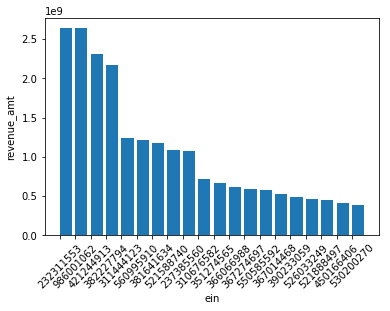

In [53]:
_.bar(width = 0.8,align = 'edge')

It's easy to see that the top 4 NFPOs are leading by a significant gap.

Take a closer look at the activities of these 4 companies.
* GEISINGER HEALTH PLAN: Prepared group health plan(164) and Other health services(179). This is a health insurance company.
* CHANCELLOR MASTERS & SCHOLARS OF THE UNIVERSITY OF OXFORD (also known as University of Oxford): Private school(046), School, college, trade school, etc. (030), Library(061) 
* PRAIRIE MEADOWS RACE TRACK & CASINO INC: Other sports or athletic activities 
* MICHIGAN CATASTROPHIC CLAIMS ASSOCIATION U S: Assigned risk insurance activities (212). It provides reinsurance for Michigan's auto insurance companies. 

We see that the people in this region place healthcare in the top priority here as the number 1 place belongs to  GEISINGER HEALTH PLAN. We think that the revenue from operating the business plays a much more important role than the revenue from donations in this case as Geisinger does not serve a specific communities or interests. Thus, people may not have the incentive to donate to such organizations. Furthermore, it is easy to find a substitute for a health insurance company. Other than Americans’ growing demand for healthcare services, good business strategies have to play a role in Geisinger’s #1 ranking. 

We are surprised to see the University of Oxford in the non-deductible list since contributions to educational organizations are usually deductible. However, we realized that Oxford is a school in the UK and thus, it does not serve US public. Its #2 in ranking indicates the generosity of Oxford’s alumni as well as people’s demand to study at Oxford (the majority of revenue amount is from tuition). #3 and #4 imply how much people in this region  enjoy horse races and Gambling (PRAIRIE MEADOWS), and the great scale of Michigan's auto insurance companies and of Michigan’s auto industry in general(MICHIGAN CATASTROPHIC CLAIMS ASSOCIATION U S).


To look only at the activities or the top earners, we create a activity_non_deduct table.

In [44]:
%%sql
drop table if exists activity_non_deduct;
create table activity_non_deduct (
    activity integer not null
    )


 * postgresql://student@/final_project
Done.
Done.


[]

List all activities under Activity1, Activity2, Activity3 of the top 1000 organizations with the highest revenue in 2018 in one column Activity in table activity_non_deduct;


In [45]:
%%sql
insert into activity_non_deduct (activity)
select activity1
from basic_information as b inner join exempt_organization as e
on b.key = e.basic_information_key 
inner join time as t
on t.key = e.time_key
inner join address as a 
on a.key = e.address_key
where deductibility = '2' and tax_period like '2018__' and revenue_amt is not NULL
order by revenue_amt desc
limit 1000


 * postgresql://student@/final_project
1000 rows affected.


[]

In [46]:
%%sql
insert into activity_non_deduct (activity)
select activity2
from basic_information as b inner join exempt_organization as e
on b.key = e.basic_information_key 
inner join time as t
on t.key = e.time_key
inner join address as a 
on a.key = e.address_key
where deductibility = '2' and tax_period like '2018__' and revenue_amt is not NULL
order by revenue_amt desc
limit 1000


 * postgresql://student@/final_project
1000 rows affected.


[]

In [47]:
%%sql
insert into activity_non_deduct (activity)
select activity3
from basic_information as b inner join exempt_organization as e
on b.key = e.basic_information_key 
inner join time as t
on t.key = e.time_key
inner join address as a 
on a.key = e.address_key
where deductibility = '2' and tax_period like '2018__' and revenue_amt is not NULL
order by revenue_amt desc
limit 1000


 * postgresql://student@/final_project
1000 rows affected.


[]

Delete rows where activity = 0 since it is not a valid activity code.


In [48]:
%%sql
delete from activity_non_deduct 
where activity = 0

 * postgresql://student@/final_project
1608 rows affected.


[]

Find the top 10 most popular activities from these organizations

In [49]:
%%sql
select activity, count(*)
from activity_non_deduct
group by activity
order by count(*) desc
limit 10


 * postgresql://student@/final_project
10 rows affected.


activity,count
279,257
265,207
264,148
263,87
211,60
200,55
59,52
205,44
921,40
250,32


A bar chart to represent our findings

<BarContainer object of 10 artists>

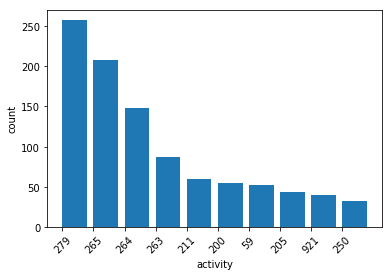

In [50]:
_.bar(width = 0.8,align = 'edge')

The most popular activities for these organizations are:
* 279: Other services or benefits to members or employees (under Employee of Membership Benefit Organizations)
* 265: Sick, accident, death, or similar benefits  (under Employee of Membership Benefit Organizations)
* 264: Employee or member welfare association (under Employee of Membership Benefit Organizations)
* 263: Association of municipal employees (under Employee of Membership Benefit Organizations)
* 211: Underwriting municipal insurance (under Business and Professional Organizations)
* 200: Business promotion (chamber of commerce, business league, etc.)
* 059: Other school related activities (Schools, Colleges and Related Activities)
* 205: Professional association 
* 921: Loans or credit reporting(Other Purposes and Activities)
* 250: Mutual ditch, irrigation, telephone, electric company or like organization (under Mutual Organizations)


We see that the top 4 activities are all under ` Employee of Membership Benefit Organization` section. This is no surprise since employment benefits is one of the biggest non-charitable concerns for Americans overall. American workers will contribute to these organizations to secure their benefits. Another finding is that  people in this region cares a lot about developing businesses and their career as many of these organizations are Business promotions and professional association. 


#### Business Question 2:


***Which activity has the highest and lowest number of organizations? Out of the most popular activities, what’s the average income for the exempt organizations in each state?***


As the activity codes mentions at most activities which the organization is working on, we’d like to see which activity is most or least popular for most organizations. In this case, we can have an overview of the common activity fields of the U.S tax-exempt organizations 


 Firstly, we create a table called Activity_count1 to display the count of different kinds of activities which shown as activity1 in the Basic_information table.

In [51]:
%%sql
DROP TABLE IF EXISTS Activity_count1;
CREATE TABLE Activity_count1 AS
SELECT activity1, COUNT(activity1)
FROM Basic_information
GROUP BY activity1
ORDER BY COUNT(activity1) desc;

 * postgresql://student@/final_project
Done.
308 rows affected.


[]

Check the first 10 records of table Activity_count1


In [52]:
%%sql
SELECT * from Activity_count1
limit 10;


 * postgresql://student@/final_project
10 rows affected.


activity1,count
0,324954
1,43148
59,30916
36,17753
602,13571
263,12774
907,9272
994,8599
29,6803
319,6404


Then we create a table called Activity_count2 to display the count of different kinds of activities which shown as activity2 in the Basic_information table.

In [53]:
%%sql
DROP TABLE IF EXISTS Activity_count2;
CREATE TABLE Activity_count2 AS
SELECT activity2, COUNT(activity2)
FROM Basic_information
GROUP BY activity2
ORDER BY COUNT(activity2) desc;

 * postgresql://student@/final_project
Done.
272 rows affected.


[]

Check the first 10 records of table Activity_count2


In [54]:
%%sql
SELECT * from Activity_count2
limit 10;

 * postgresql://student@/final_project
10 rows affected.


activity2,count
0,484195
29,11313
319,8856
59,8830
908,7823
349,7054
921,6420
279,6242
264,5654
2,5303


 Then we create a table called Activity_count3 to display the count of different kinds of activities which shown as activity3 in the Basic_information table.


In [55]:
%%sql
DROP TABLE IF EXISTS Activity_count3;
CREATE TABLE Activity_count3 AS
SELECT activity3, COUNT(activity3)
FROM Basic_information
GROUP BY activity3
ORDER BY COUNT(activity3) desc;


 * postgresql://student@/final_project
Done.
242 rows affected.


[]

Check the first 10 records of table Activity_count3

In [56]:
%%sql
SELECT * from Activity_count3
limit 10;

 * postgresql://student@/final_project
10 rows affected.


activity3,count
0,572255
319,7035
279,7030
265,6187
29,4562
120,4084
602,4000
59,3333
349,2950
40,2274


Create a table called Activity_total by joining table Activity_count1, Activity_count2, and Activity_count3 to make the same kind of activity in the three tables show in the same record

In [57]:
%%sql
DROP TABLE IF EXISTS Activity_total;
CREATE TABLE Activity_total AS
SELECT Activity_count1.activity1, Activity_count2.activity2, Activity_count3.activity3, Activity_count1.count count1, Activity_count2.count count2, Activity_count3.count count3
FROM Activity_count1
JOIN Activity_count2
  ON Activity_count1.activity1 = Activity_count2.activity2
JOIN Activity_count3
  ON Activity_count1.activity1 = Activity_count3.activity3;


 * postgresql://student@/final_project
Done.
237 rows affected.


[]

 Check the first 10 records of table Activity_total


In [58]:
%%sql
SELECT * from Activity_total
limit 10;

 * postgresql://student@/final_project
10 rows affected.


activity1,activity2,activity3,count1,count2,count3
0,0,0,324954,484195,572255
1,1,1,43148,380,770
2,2,2,1286,5303,10
3,3,3,140,103,18
4,4,4,337,88,17
5,5,5,306,165,25
6,6,6,544,832,100
7,7,7,1150,1311,643
8,8,8,157,204,48
29,29,29,6803,11313,4562


Get the sum of counts for Activity1, Activity2, and Activity3 of the same Activity code with the descending order.


In [59]:
%%sql
SELECT Activity_total.activity1 Activity, sum(Activity_total.count1 + Activity_total.count2 + Activity_total.count3) count_sum
from Activity_total
GROUP BY activity1 
ORDER BY count_sum desc
limit 10;


 * postgresql://student@/final_project
10 rows affected.


activity,count_sum
0,1381404
1,44298
59,43079
29,22678
602,22383
319,22295
36,21745
279,19293
263,13404
907,11367


In this way we get the most popular activities in the Mid-Atlantic and Great Lakes Area. We can find that Activity 001,059,029,602, and 319 are top 5 activities, which are Church, synagogue, etc/ Other school related activities / Other religious activities / Gifts, grants, or loans to other organizations / Other social activities. And in overview, they belong to: 
 01. Religious Activities ;02. Schools, Colleges and Related Activities; 03.Religious Activities; 04. Activities Purposes and Activities; 05. Sports, Athletic Recreational and Social Activities. And the count for Activity 001(Church, synagogue, etc) is 44298, and for Activity 059 (Other school related activities) is 43079, which are much larger than the other activities.


****From the result, we can summarize that the most popular activities of the exempt organizations in the Mid-Atlantic and Great Lakes Area are mainly about religion and education. And that means that Mid-Atlantic and Great Lakes Area do value religion and education.****


Then we get the sum of counts for Activity1, Activity2, and Activity3 of the same Activity code with the ascending order.

In [60]:
%%sql
SELECT Activity_total.activity1 Activity, sum(Activity_total.count1 + Activity_total.count2 + Activity_total.count3) count_sum
from Activity_total
GROUP BY activity1 
ORDER BY count_sum
limit 10;

 * postgresql://student@/final_project
10 rows affected.


activity,count_sum
513,5
535,7
323,11
926,13
533,14
518,15
532,15
525,16
510,16
156,17


In this way, we can find the most unpopular activities of the exempt organizations in the Mid-Atlantic and Great Lakes Area. We can find that Activity 513, 535, 323, 926, and 533 are top 5 activities, which are Weapons systems / Racial integration  / Key club  / Government instrumentality other than section 501(c)  / Urban renewal. And in overview, they belong to: 
01. Advocacy (Attempt to influence public opinion concerning);02. Advocacy (Attempt to influence public opinion concerning); 03.Youth Activities; 04. Other Purposes and Activities; 05. Advocacy (Attempt to influence public opinion concerning). So we can conclude that the most unpopular activities of the exempt organizations in the Mid-Atlantic and Great Lakes Area are mainly about Advocacy (Attempt to influence public opinion concerning). Many of the advocacies are very limited to a certain field, so maybe that’s the reason why they are not so popular.


****From the analysis above, we found Activity 001(Church, synagogue, etc) and Activity 059 (Other school related activities) are the most popular activities. So we’d like to explore more deeply for the two kinds of activities by calculating and comparing the average income amount of each state.****


Call for the library `matplotlib` to create a bar chart, the aim is to have an intuitive overview of the compariation of average net profits of each state.

In [61]:
%matplotlib inline

find the bar chart of the average income_amount of each state where organizations are working on activities that related to Church, synagogue.

In [62]:
%%sql
SELECT avg(eo.income_amt), a.state
from Exempt_Organization as eo
JOIN Address as a
ON a.key = eo.address_key
JOIN Basic_information as b
ON b.key = eo.basic_information_key
where b.activity1 = 1 or b.activity2 = 1 or b.activity3 = 1 
group by a.state;


 * postgresql://student@/final_project
19 rows affected.


avg,state
19636875.584821428571,PA
31492977.762820512821,WI
229292505.49586777,MN
5882252.851851851852,DC
38347223.835820895522,OH
11886303.250000000000,NE
2353352.198347107438,NC
22079573.096774193548,ND
9424254.823529411765,DE
131818.923076923077,WV


<BarContainer object of 19 artists>

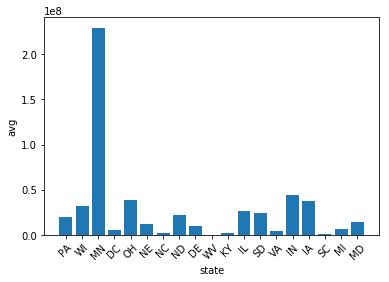

In [63]:
_.bar()

In [64]:
%matplotlib inline

find the bar chart of the average income_amount of each state where organizations are working on on school related activities


In [65]:
%%sql
SELECT avg(eo.income_amt), a.state
from Exempt_Organization as eo
JOIN Address as a
ON a.key = eo.address_key
JOIN Basic_information as b
ON b.key = eo.basic_information_key
where b.activity1 = 59 or b.activity2 = 59 or b.activity3 = 59
group by a.state;

 * postgresql://student@/final_project
19 rows affected.


avg,state
2544851.062286272594,PA
9836053.292170591980,DC
2168901.314413265306,MN
4249165.807981492192,WI
2486727.113498992612,OH
1214107.232269503546,NE
5902121.682801822323,NC
2425004.286783042394,WV
1063303.656652360515,ND
1590875.769696969697,DE


<BarContainer object of 19 artists>

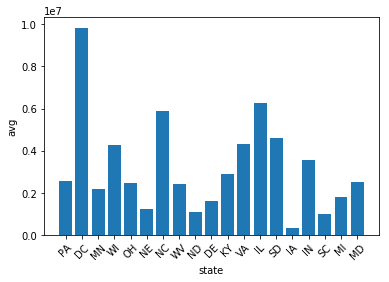

In [66]:
_.bar()

From bar charts, we are surprised to see that in activities that related to Church, synagogue, the disparity of average net profits is huge among each state. Minnesota is the top state which has over 3 times more profits than the second state. However, “Thrivent financial for lutherans” boosts this result with its huge income amount. This gives us a guess that for church or synagogue field, tax-exempted organizations that  engage to work in this activity may consider operating in Minnesota, which gives them a huge advantages than other states. 
For activities that related to school, DC is the state where organizations have more average net profits. NC and IL are #2 and #3 in this field. We could explain this result as these three states are three clusters where schools and universities located commonly.


#### Business Question 3:

***Consider the last 5 tax periods.  Which months have the highest number of organizations that first received the exempt status?***

For this question, we want to find the density of ruling months for the most recent 5 years to see if there is a trend of tax-exempt for organizations on certain months

First, check the context of time table for the first 10 rows

In [68]:
%%sql
select *
from time limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,ruling_year,ruling_month,tax_period
1,1965,4,201408
2,1986,1,201706
3,1971,12,201905
4,1996,8,201512
5,1999,7,201904
6,1992,11,0
7,1961,11,201712
8,1933,9,201812
9,1955,1,0
10,1955,3,201807


check the context of Exempt_Organization table


In [69]:
%%sql
select *
from Exempt_Organization limit 10;

 * postgresql://student@/final_project
10 rows affected.


income_amt,revenue_amt,basic_information_key,time_key,income_cd_key,address_key
0,0,6,7136,6,88642
0,0,13,880,6,236753
427507,67851,14,26206,2,243044
0,0,12,15371,6,306830
6808224,4862977,9,16190,10,330507
194765,None,66,25046,2,36799
63361,63361,60,23507,5,42699
263946,258901,55,3547,2,72165
80834,56184,58,11562,5,112378
688048,None,57,12871,4,124847


setting the condition where the year is 2019 and show the first 10 rows


In [70]:
%%sql
select * from time
where ruling_year = '2019' limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,ruling_year,ruling_month,tax_period
63,2019,5,200106
86,2019,10,201405
143,2019,10,201409
163,2019,6,201712
169,2019,3,201801
233,2019,7,201905
321,2019,3,201809
506,2019,8,201811
539,2019,6,201806
726,2019,5,201808


First, we want the density of ruling months for the year 2019. We select ruling month and the count of ruling month from time table, and left join this table with Exempt_Organization table (fact table) on the condition where key from time table is equal to time_key from Exempt_Organization table. And, we set a condition where ruling_year is equal to 2019 and group by ruling_month. In order to analyze the trend clearly, we order ruling_month starting from 1 to 12 by using the ORDER BY function.

In [71]:
%%sql
select time.ruling_month, count(time.ruling_month) from time left join Exempt_Organization
on time.key = Exempt_Organization.time_key where time.ruling_year = '2019' group by time.ruling_month
order by time.ruling_month
limit 20;

 * postgresql://student@/final_project
10 rows affected.


ruling_month,count
1,184
2,2698
3,3579
4,3613
5,3482
6,2786
7,3201
8,2820
9,2559
10,1412


In [72]:
%matplotlib inline

This is a bar chart of the density of ruling months for the year 2019. We can see Feb, Mar, and Apr have the highest number of counts.

<BarContainer object of 10 artists>

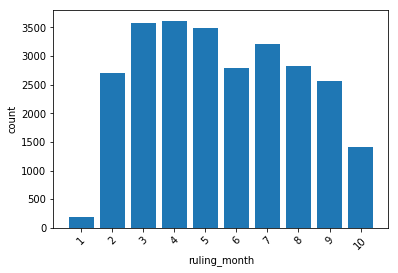

In [73]:
_.bar()

setting the condition where the year is 2018 and show the first 10 rows


In [74]:
%%sql
select * from time
where ruling_year = '2018' limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,ruling_year,ruling_month,tax_period
66,2018,10,201904
108,2018,6,201406
111,2018,10,201312
129,2018,2,201512
145,2018,3,200806
216,2018,2,201804
222,2018,7,201906
343,2018,3,201802
364,2018,4,201706
374,2018,8,201902


Then, we want the density of ruling months for the year 2018. We select ruling month and the count of ruling month from time table, and left join this table with Exempt_Organization table (fact table) on the condition where key from time table is equal to time_key from Exempt_Organization table. And, we set a condition where ruling_year is equal to 2018 and group by ruling_month. In order to analyze the trend clearly, we order ruling_month starting from 1 to 12 by using the ORDER BY function. 


In [75]:
%%sql
select time.ruling_month, count(time.ruling_month) from time left join Exempt_Organization
on time.key = Exempt_Organization.time_key where time.ruling_year = '2018' group by time.ruling_month
order by time.ruling_month
limit 20

 * postgresql://student@/final_project
12 rows affected.


ruling_month,count
1,1995
2,2133
3,2648
4,2494
5,2886
6,2395
7,2231
8,2573
9,2243
10,1522


In [76]:
%matplotlib inline

This is a bar chart of the density of ruling months for the year 2018. We can see Mar, Apr, and May have the highest number of counts.

<BarContainer object of 12 artists>

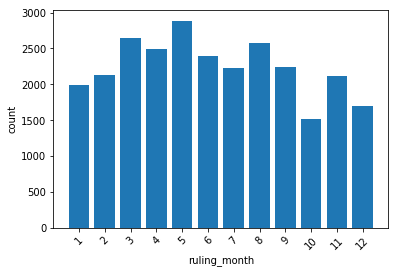

In [77]:
_.bar()

setting the condition where the year is 2017 and show the first 10 rows


In [78]:
%%sql
select * from time
where ruling_year = '2017' limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,ruling_year,ruling_month,tax_period
112,2017,9,201905
150,2017,4,201811
314,2017,7,201808
360,2017,10,201901
426,2017,11,201905
452,2017,6,201512
456,2017,6,201606
724,2017,6,201612
754,2017,6,201804
815,2017,3,201901


Then, we want the density of ruling months for the year 2017. We select ruling month and the count of ruling month from time table, and left join this table with Exempt_Organization table (fact table) on the condition where key from time table is equal to time_key from Exempt_Organization table. And, we set a condition where ruling_year is equal to 2017 and group by ruling_month. In order to analyze the trend clearly, we order ruling_month starting from 1 to 12 by using the ORDER BY function.


In [79]:
%%sql
select time.ruling_month, count(time.ruling_month) from time left join Exempt_Organization
on time.key = Exempt_Organization.time_key where time.ruling_year = '2017' group by time.ruling_month 
order by time.ruling_month
limit 20;

 * postgresql://student@/final_project
12 rows affected.


ruling_month,count
1,1685
2,2196
3,2777
4,2159
5,2255
6,2517
7,1783
8,2722
9,2416
10,1956


In [80]:
%matplotlib inline

This is a bar chart of the density of ruling months for the year 2017. We can see Mar,Jun, and Aug have the highest number of counts.


<BarContainer object of 12 artists>

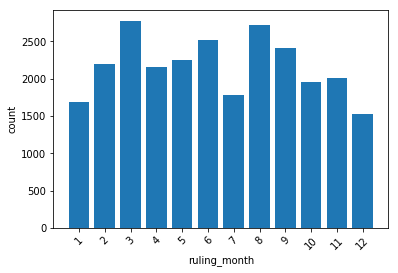

In [81]:
_.bar()

setting the condition where the year is 2016 and show the first 10 rows


In [82]:
%%sql
select * from time
where ruling_year = '2016' limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,ruling_year,ruling_month,tax_period
157,2016,1,201811
164,2016,3,201710
175,2016,6,201906
342,2016,6,201805
379,2016,12,201806
583,2016,2,201808
769,2016,12,201712
833,2016,9,201006
906,2016,6,201704
922,2016,9,201610


Then, we want the density of ruling months for the year 2016. We select ruling month and the count of ruling month from time table, and left join this table with Exempt_Organization table (fact table) on the condition where key from time table is equal to time_key from Exempt_Organization table. And, we set a condition where ruling_year is equal to 2016 and group by ruling_month. In order to analyze the trend clearly, we order ruling_month starting from 1 to 12 by using the ORDER BY function.


In [83]:
%%sql
select time.ruling_month, count(time.ruling_month) from time left join Exempt_Organization
on time.key = Exempt_Organization.time_key where time.ruling_year = '2016' group by time.ruling_month
order by time.ruling_month
limit 20;

 * postgresql://student@/final_project
12 rows affected.


ruling_month,count
1,1612
2,2169
3,2336
4,1963
5,1965
6,1804
7,1868
8,2185
9,2260
10,1847


In [84]:
%matplotlib inline

This is a bar chart of the density of ruling months for the year 2016. We can see the ruling month Feb, Mar, Aug, Sep have the highest number of counts.

<BarContainer object of 12 artists>

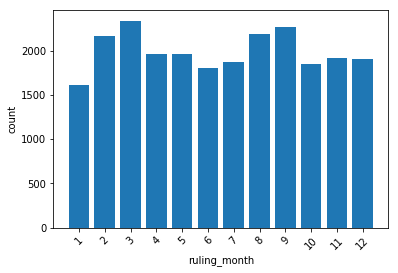

In [85]:
_.bar()

setting the condition where the year is 2015 and show the first 10 rows


In [86]:
%%sql
select * from time
where ruling_year = '2015' limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,ruling_year,ruling_month,tax_period
76,2015,2,201812
85,2015,11,201802
249,2015,2,201807
279,2015,2,201908
284,2015,9,201904
319,2015,5,201802
434,2015,2,201810
442,2015,1,201709
459,2015,5,201904
502,2015,8,201907


Then, we want the density of ruling months for the year 2015. We select ruling month and the count of ruling month from time table, and left join this table with Exempt_Organization table (fact table) on the condition where key from time table is equal to time_key from Exempt_Organization table. And, we set a condition where ruling_year is equal to 2015 and group by ruling_month. In order to analyze the trend clearly, we order ruling_month starting from 1 to 12 by using the ORDER BY function.


In [87]:
%%sql
select time.ruling_month, count(time.ruling_month) from time left join Exempt_Organization
on time.key = Exempt_Organization.time_key where time.ruling_year = '2015' group by time.ruling_month
order by time.ruling_month
limit 20;

 * postgresql://student@/final_project
12 rows affected.


ruling_month,count
1,1617
2,2351
3,2347
4,2266
5,1776
6,1926
7,1752
8,1668
9,1735
10,1906


In [88]:
%matplotlib inline

This is a bar chart of the density of ruling months for the year 2015. We can see the ruling month Feb, Mar, Apri have the highest number of counts.

<BarContainer object of 12 artists>

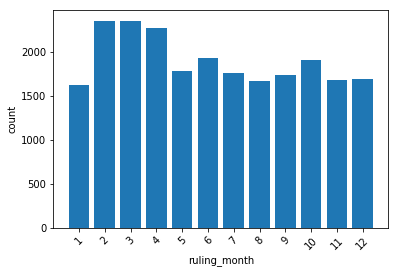

In [89]:
_.bar()

From those charts, we can see many organizations tend to become exempt from Feb to Apr and from Aug to Sep. The month Jul, Nov, and Dec tend to have the lowest possibility of tax-exempt. From this result, we suggest organizations apply for tax-exempt on Feb, Mar, Apr, Aug, and Sep, since organizations are likely to be exempt on those months. If organizations are granted tax-exempt, they could use the extra money to do their business.